In [11]:
import glob
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dfs = []

for f in glob.glob("output/*eval_time.csv"):
    fname = Path(f).name
    split = fname.split("_")

    # fname is of the form rtx8000_mdetr_efficientnetB3_10_eval_time.csv

    gpu_type = split[0]
    model_type = split[2]
    bs = split[3]

    df = pd.read_csv(f)

    df["gpu_type"] = gpu_type
    df["model_type"] = model_type
    df["bs"] = int(bs)
    
    dfs.append(df)

combined = pd.concat(dfs).drop("Unnamed: 0", axis=1)
combined

,total_cumulative_time,batch_time,model_scoring_time,post_processing_time,gpu_type,model_type,bs
0,7.652452,5.411121,3.733840,1.552557,rtx8000,efficientnetB3,10
1,9.725491,1.765453,0.281142,1.451199,rtx8000,efficientnetB3,10
2,11.503588,1.756125,0.280393,1.442852,rtx8000,efficientnetB3,10
3,13.331980,1.804251,0.306628,1.460782,rtx8000,efficientnetB3,10
4,15.153791,1.795350,0.306558,1.452703,rtx8000,efficientnetB3,10
...,...,...,...,...,...,...,...
311,1757.041815,5.264950,1.209939,3.933433,v100,efficientnetB5,25
312,1763.168690,4.889568,0.987383,3.802969,v100,efficientnetB5,25
313,1769.536860,5.236986,1.217451,3.896962,v100,efficientnetB5,25
314,1775.943139,5.286016,1.254733,3.908134,v100,efficientnetB5,25


In [22]:
runtimes = combined.groupby(["gpu_type", "model_type", "bs"])["total_cumulative_time"].max().reset_index()
runtimes

,gpu_type,model_type,bs,total_cumulative_time
0,rtx8000,efficientnetB3,1,5985.057900
1,rtx8000,efficientnetB3,5,2315.462034
2,rtx8000,efficientnetB3,10,1879.812081
3,rtx8000,efficientnetB3,25,1952.657409
4,rtx8000,efficientnetB5,1,6097.589397
5,rtx8000,efficientnetB5,5,2333.660515
6,rtx8000,efficientnetB5,10,2024.211313
7,rtx8000,efficientnetB5,25,2155.363988
8,rtx8000,resnet101,1,5984.471876
9,rtx8000,resnet101,5,2398.830361


['rtx8000' 'v100'] ['efficientnetB3' 'efficientnetB5' 'resnet101']


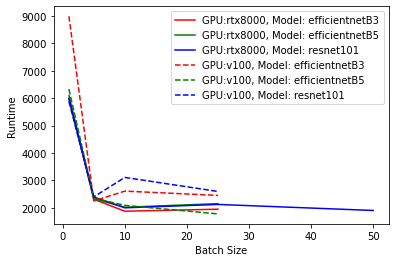

In [34]:
# Plot runtime of each model type and GPU as a function of batch size

gpu_types = runtimes["gpu_type"].unique()
model_types = runtimes["model_type"].unique()

line_formats = ["-", "--"]
colors = ["r", "g", "b"]
print(gpu_types, model_types)

for i, gpu_type in enumerate(gpu_types):
    for j, model_type in enumerate(model_types):
        df = runtimes[(runtimes["gpu_type"] == gpu_type) & (runtimes["model_type"] == model_type)]

        ln_format = colors[j] + line_formats[i]
        plt.plot(df["bs"], df["total_cumulative_time"], ln_format, label=f"GPU:{gpu_type}, Model: {model_type}")

plt.xlabel("Batch Size")
plt.ylabel("Runtime")
plt.legend()

In [25]:
# Plot throughput
mn_throughputs = combined.groupby(["gpu_type", "model_type", "bs"])["model_scoring_time"].agg(["mean", "std"]).reset_index()
mn_throughputs

,gpu_type,model_type,bs,mean,std
0,rtx8000,efficientnetB3,1,0.052380,0.024823
1,rtx8000,efficientnetB3,5,0.159283,0.097573
2,rtx8000,efficientnetB3,10,0.311714,0.134971
3,rtx8000,efficientnetB3,25,0.824511,0.190238
4,rtx8000,efficientnetB5,1,0.076560,0.045154
5,rtx8000,efficientnetB5,5,0.264559,0.052029
6,rtx8000,efficientnetB5,10,0.546904,0.138613
7,rtx8000,efficientnetB5,25,1.503938,0.367796
8,rtx8000,resnet101,1,0.071865,0.057398
9,rtx8000,resnet101,5,0.247193,0.084665


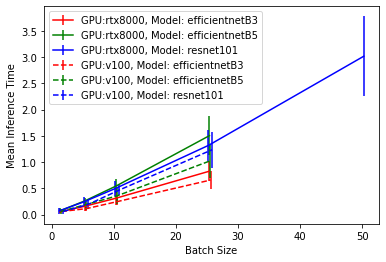

In [72]:
import random

for i, gpu_type in enumerate(gpu_types):
    for j, model_type in enumerate(model_types):
        df = mn_throughputs[(mn_throughputs["gpu_type"] == gpu_type) & (mn_throughputs["model_type"] == model_type)]

        ln_format = colors[j] + line_formats[i]
        plt.errorbar(df["bs"] + random.random(), df["mean"], yerr=df["std"], fmt=ln_format, label=f"GPU:{gpu_type}, Model: {model_type}")

plt.xlabel("Batch Size")
plt.ylabel("Mean Inference Time")
plt.legend()

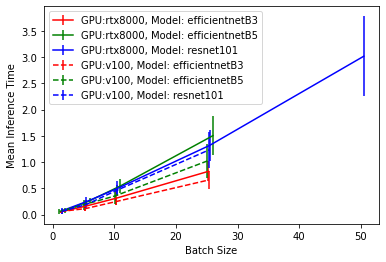

In [73]:
# Plot throughput
post_processing_times = combined.groupby(["gpu_type", "model_type", "bs"])["post_processing_time"].agg(["mean", "std"]).reset_index()
post_processing_times

for i, gpu_type in enumerate(gpu_types):
    for j, model_type in enumerate(model_types):
        df = mn_throughputs[(post_processing_times["gpu_type"] == gpu_type) & (post_processing_times["model_type"] == model_type)]

        ln_format = colors[j] + line_formats[i]
        plt.errorbar(df["bs"] + random.random(), df["mean"], yerr=df["std"], fmt=ln_format, label=f"GPU:{gpu_type}, Model: {model_type}")

plt.xlabel("Batch Size")
plt.ylabel("Mean Inference Time")
plt.legend()